In [1]:
import pickle 
x_train = pickle.load(open("x_train", "rb"))
x_test = pickle.load(open("x_test", "rb"))
y_train = pickle.load(open("y_train", "rb"))
y_test = pickle.load(open("y_test", "rb"))

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as  np 
from tensorflow.keras.preprocessing.sequence import pad_sequences

def build_tok (words) : 
    t = Tokenizer()
    t.fit_on_texts(words)
    return t
def max_length(text) : 
    return max(len(a.split()) for a in text)

def encoding (tokenizer, words, length) : 
    encoded = tokenizer.texts_to_sequences(words)
    encoded_pad = pad_sequences(encoded, maxlen=length, padding="post")
    return encoded_pad

t_train= build_tok(x_train)
t_test= build_tok(x_test)
max_len = max_length(x_train)
print(f"the numbers of words is {len(t_train.word_index)} words in the train data")
print(f"the numbers of words is {len(t_test.word_index)} words in the test data")
print(f"the max length for the sentance is {max_len} words")

the numbers of words is 22847 words in the train data
the numbers of words is 14655 words in the test data
the max length for the sentance is 27 words


In [4]:
import numpy as np 
train_encode = encoding(t_train, x_train, max_len)
test_encode = encoding(t_test, x_test, max_len)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(train_encode[1])
print(y_train[1])

[2724 1020 2725 1021   54   66  119 2471  120  107    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]
0


In [5]:
print("the shape of traing data is :")
print(f"  the shape of x_train is {train_encode.shape}" )
print(f"  the shape of y_train is{y_train.shape}")
print("="*50)
print("the shape of test data is :")
print(f"  the shape of x_test is {test_encode.shape}" )
print(f"  the shape of y_test is{y_test.shape}")

the shape of traing data is :
  the shape of x_train is (18696, 27)
  the shape of y_train is(18696,)
the shape of test data is :
  the shape of x_test is (8013, 27)
  the shape of y_test is(8013,)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Embedding, Dense, Flatten, Dropout, MaxPool1D, Input, LSTM

model = Sequential()
model.add(Embedding(len(t_train.word_index)+1, 100, input_length=max_len ))
model.add(Conv1D(61, 3, activation="relu"))
model.add(MaxPool1D())
# model.add(Conv1D(32, 3, activation="relu"))
# model.add(MaxPool1D())
# model.add(Flatten())
model.add(LSTM(64, dropout=0.1))
# model.add(Dense(5, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

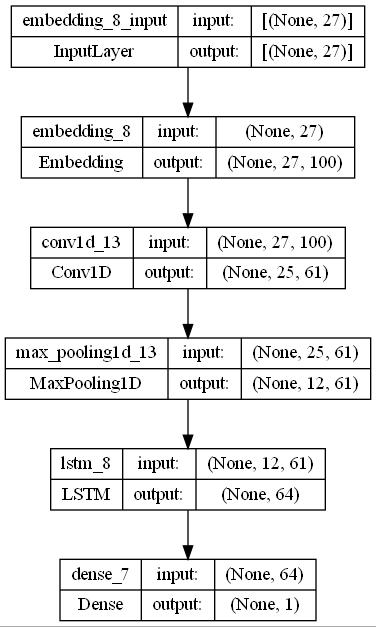

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model, "model.jpg", show_shapes=True)

In [30]:
from tensorflow.keras import callbacks
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 
check = callbacks.ModelCheckpoint("bashar", save_best_only = True)
model.fit(train_encode, y_train, validation_data=(test_encode, y_test), epochs=5, batch_size = 40,callbacks=[plateau, check] )

Epoch 1/5
466/468 [============================>.] - ETA: 0s - loss: 0.5173 - accuracy: 0.7314

INFO:tensorflow:Assets written to: bashar\assets


INFO:tensorflow:Assets written to: bashar\assets


468/468 [==============================] - 20s 38ms/step - loss: 0.5170 - accuracy: 0.7315 - val_loss: 0.9468 - val_accuracy: 0.5061 - lr: 0.0010
Epoch 2/5
468/468 [==============================] - 10s 22ms/step - loss: 0.2035 - accuracy: 0.9226 - val_loss: 1.3472 - val_accuracy: 0.5168 - lr: 0.0010
Epoch 3/5
468/468 [==============================] - ETA: 0s - loss: 0.0513 - accuracy: 0.9833
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
468/468 [==============================] - 10s 22ms/step - loss: 0.0513 - accuracy: 0.9833 - val_loss: 1.7256 - val_accuracy: 0.5110 - lr: 0.0010
Epoch 4/5
468/468 [==============================] - 10s 22ms/step - loss: 0.0136 - accuracy: 0.9965 - val_loss: 2.2994 - val_accuracy: 0.5109 - lr: 2.0000e-04
Epoch 5/5
467/468 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9990
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
468/468 [==============================] - 10s 2

In [17]:
x = ["former versace store clerk sues secret black code minority shoppers"]
x_t= build_tok(x)
x_e = encoding(x_t, x, max_len)
pre = model.predict(x_e)
acc = y_train[0]
print(np.round(pre[0][0]))
print(acc)

1/1 [==============================] - 0s 369ms/step
1.0
1


In [18]:
from tensorflow.keras.models import load_model

In [19]:
bashar = load_model("bashar/")
x = ["former versace store clerk sues secret black code minority shoppers"]
x_t= build_tok(x)
x_e = encoding(x_t, x, max_len)
pre = bashar.predict(x_e)
acc = y_train[0]
print(np.round(pre[0][0]))
print(acc)

1/1 [==============================] - 0s 390ms/step
1.0
1
